### hw_ 2  

### Дискретные случайные величины. Закон распределения вероятностей.  Биномиальный закон распределения. Распределение Пуассона

In [68]:
import numpy as np
import math

**Задача 1 и 2**

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

Подсказка: постройте закон распределения случайной величины X.
<hr>

<center>Решение: <br>

Пусть $X$ — число правильных ответов при простом угадывании. Нам надо найти её  закон распределения:

<table border="3">
    <tr>
        <th>$x$</th>
        <td>0</td>
        <td>1</td>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td>5</td>
    </tr>
    <tr>
        <th>$P(X=x)$</th>
        <td>?</td>
        <td>?</td>
        <td>?</td>
        <td>?</td>
        <td>?</td>
        <td>?</td>
    </tr>
</table>


$X$ распределена  по  __биномиальному  закону__  с  параметрами $n = 5$ (число  вопросов), и $p = \dfrac{1}{4}$ - 
(вероятность угадать ответ), поэтому вероятности вычисляются по формуле Бернулли:  $p(k) = C_n^kp^k(1-p)^{n-k}$

Поскольку 𝑋 распределена по биномиальному закону, то:

Математическое ожидание биномиального распределения:
$M(X) = n \cdot p$ <br>
Дисперсия:
$D(X) = n \cdot p \cdot (1  -  p)$


In [69]:
def get_combination(n, k):
    "сочетание"
    c = np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))
    return c

In [75]:
#n - количество вопросов
#p - вероятность правильных ответов
n = 5
p = 1 / 4
M = n * p
D = n * p * (n - p)
print("ОТВЕТ:")
print(f'Математическое ожидание равно {M}')
print(f'Дисперсия равна {D}')

ОТВЕТ:
Математическое ожидание равно 1.25
Дисперсия равна 5.9375


In [81]:
# Для прикола определим ЗАКОН РАСПРЕДЕЛЕНИЯ
P_x = []
sum = 0
for k_item in range(0,6):
    P_x.append(get_combination(5,k_item) * (p ** k_item) *  (1 - p)**(n - k_item)) 
    sum += get_combination(5,k_item) * (p ** k_item) *  (1 - p)**(n - k_item)
P_x

[0.2373046875,
 0.3955078125,
 0.263671875,
 0.087890625,
 0.0146484375,
 0.0009765625]


<table border="3">
    <tr>
        <th>$x$</th>
        <td>0</td>
        <td>1</td>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td>5</td>
    </tr>
    <tr>
        <th>$P(X=x)$</th>
        <td>0.2373</td>
        <td>0.3955</td>
        <td>0.2637</td>
        <td>0.0879</td>
        <td>0.0146</td>
        <td>0.0009</td>
    </tr>
</table>


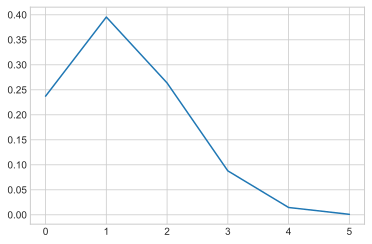

In [80]:
plt.plot(P_x)

In [82]:
# Проверим, что в сумме вероятности равны "1":
print(sum)

1.0


**Задача_3**

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.
<hr>

<center>Решение: <br>


Раз идет речь о некоторм промежутке времени, то применимо распределение Пуассона, где вероятность считается по формуле:
    
$$P(X = k) = \dfrac{\lambda^k e^{-\lambda}}{k!}$$

Здесь $\lambda$ —  среднее число писем со спамом.
    $k$ - принимаемые значения случайной величины 0, 1, ...

Нам надо получить не более N писем, т.е. от 0 до N писем, это значит, что надо скадывать вероятности для 0 писем, для 1 письма и т.д. пока не получим сумму вероятностей  = 0,95:
    
$$P(X \leq N) = \displaystyle\sum_{k = 0}^{N} \dfrac{10^{k} e^{-10}}{k!}$$
    
    
    
    
    
  
    

In [83]:
def get_puasson(k, lmbd):
    """Формула Пуассона"""
    p = (lmbd ** k) * (np.exp(-lmbd)) / np.math.factorial(k)
    return p

In [92]:
sum = 0
lmbd = 10
N = 0
while sum < 0.95:
    sum += get_puasson(N, lmbd)
    N += 1
print(f'ОТВЕТ: количество писем, при котором вероятность получить спам не превышает 0,95 = {N}')

ОТВЕТ: количество писем, при котором вероятность получить спам не превышает 0,95 = 16


<hr>

**Задача_3**


Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.
<hr>

<center> Решение:
    
Событие $A$, которое наступает с вероятностью $p$. __Биномиальный закон__ описывает распределение случайной величины $X$, задающей число наступлений события $A$ в ходе проведения $n$ независимых опытов.

Биномиальный закон распределения описывается __формулой Бернулли__:
$$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

$X$ распределена  по  __биномиальному  закону__  с  параметрами $n \geq 6$ (число  выстрелов), и $p = 0,01$ - 
(вероятность попадания одним выстрелом), поэтому вероятности вычисляются по формуле Бернулли:  $p(k) = C_n^kp^k(1-p)^{n-k}$

Нам надо, что бы совокупная вероятность попаданий 6 и более раз из N выстрелов превышала 0.9. <br>
Т.е. $P(n \geq 6) = 1 - P(n < 6)$ <br>
$P(n<6)$ - это совокупная вероятность попаданий от 0 до 5 раз

In [97]:
def get_combination(n, k):
    "сочетание"
    c = np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))
    return c

In [107]:
def get_bernully(n, k):
    p_ = 0.01
    b = get_combination(n,k) * (p_**k) * (1 - p_)**(n - k)
    return b

In [114]:
P = 0
sum_p = 0
k = 6
n = 6
while (P < 0.9):
    sum_p = 0
    for k_item in range(0,6):
        sum_p += get_bernully(n,k_item)
    P = 1 - sum_p
    n += 1
       
print(f'ОТВЕТ: количество выстрелов, при котором вероятность совершить не менее 6 попаданий будет 0,9 = {n}')

ОТВЕТ: количество выстрелов, при котором вероятность совершить не менее 6 попаданий будет 0,9 = 927
